**Comparison of the effect of family bonding on girls with same-sex sexual orientation and girls with non-same-sex sexual orientation**

by Sheyda Mohammadi & Sajjad Rezvani Khaledi


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [12]:
df = pd.read_excel('data143.xlsx')
#PBI Parker

df = df.drop( [0,1])
df = df.reset_index(drop=True)

time_col_name1 = df.columns[-2]
time_col_name2 = df.columns[-1]
df = df.drop([time_col_name1,time_col_name2] , axis=1 )
df


,شناسه پاسخ دهنده,لطفا گرایش جنسی خود را تعیین کنید.,با من با صدایی گرم و دوستانه صحبت می کردند.,به میزانی که نیاز داشتم به من کمک نمی کردند.,به من اجازه می دادند کارهایی را که دوست داشتم را انجام دهم.,به نظر می رسید از لحاظ عاطفی با من سرد بودند.,به نظر می رسید مشکلات و نگرانی های مرا درک می کردند.,با من مهربون بودند.,دوست داشتند برای من تصمیم بگیرند.,نمی خواستند من بزرگ شوم.,...,به من این احساس را می دادند که خواستنی نبودم.,وقتی من عصبانی بودم می توانستند به من احساس بهتری بدهند.,با من زیاد صحبت نمی کردند.,سعی می کردند من را به خودشان وابسته کنند.,احساس می کردند نمی توانم از خودم مراقبت کنم،مگر آنکه آنها اطراف من باشند.,به همان قدر که می خواستم آزادی می دادند.,به من اجازه می دادند هر قدر که می خواهم بیرون بروم.,از من حمایت بیش از حد می کردند.,مرا تحسین نمی کردند.,به من اجازه می دادند که هر گونه خوشم می آید لباس بپوشم.
0,m3SK,4.0,تقریبا کم,تقریبا زیاد,خیلی کم,خیلی زیاد,خیلی کم,تقریبا کم,خیلی زیاد,خیلی کم,...,تقریبا کم,خیلی کم,تقریبا زیاد,خیلی زیاد,تقریبا زیاد,خیلی کم,خیلی کم,تقریبا کم,تقریبا زیاد,خیلی کم
1,wIHk,1.0,تقریبا زیاد,تقریبا کم,تقریبا زیاد,خیلی کم,تقریبا زیاد,تقریبا زیاد,خیلی کم,خیلی کم,...,خیلی کم,تقریبا کم,خیلی کم,خیلی کم,تقریبا زیاد,تقریبا کم,خیلی کم,تقریبا زیاد,خیلی کم,خیلی زیاد
2,MHI7,9.0,تقریبا کم,تقریبا زیاد,خیلی کم,تقریبا کم,خیلی کم,تقریبا کم,خیلی زیاد,تقریبا زیاد,...,خیلی زیاد,خیلی کم,تقریبا زیاد,خیلی زیاد,خیلی زیاد,خیلی کم,خیلی کم,خیلی ریاد,تقریبا کم,خیلی کم
3,XmNQ,5.0,تقریبا زیاد,تقریبا کم,تقریبا کم,خیلی کم,تقریبا زیاد,تقریبا زیاد,خیلی زیاد,خیلی کم,...,خیلی کم,تقریبا کم,خیلی کم,تقریبا زیاد,تقریبا زیاد,خیلی کم,تقریبا زیاد,تقریبا زیاد,خیلی کم,تقریبا زیاد
4,t5Bq,9.0,خیلی کم,خیلی زیاد,خیلی زیاد,خیلی کم,تقریبا زیاد,تقریبا کم,خیلی زیاد,خیلی کم,...,تقریبا کم,تقریبا زیاد,خیلی زیاد,تقریبا کم,خیلی کم,خیلی زیاد,تقریبا زیاد,تقریبا کم,خیلی کم,خیلی زیاد
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,qGVq,9.0,تقریبا زیاد,تقریبا کم,تقریبا زیاد,تقریبا کم,خیلی کم,تقریبا زیاد,خیلی زیاد,خیلی زیاد,...,تقریبا کم,خیلی کم,تقریبا زیاد,خیلی زیاد,تقریبا زیاد,خیلی کم,خیلی کم,تقریبا کم,تقریبا زیاد,تقریبا کم
139,q1Vp,1.0,تقریبا زیاد,خیلی کم,تقریبا کم,تقریبا کم,تقریبا کم,تقریبا کم,خیلی زیاد,تقریبا زیاد,...,تقریبا زیاد,خیلی کم,خیلی زیاد,خیلی زیاد,خیلی زیاد,خیلی کم,تقریبا کم,تقریبا کم,تقریبا کم,تقریبا کم
140,C8oY,9.0,تقریبا زیاد,تقریبا کم,خیلی زیاد,تقریبا کم,خیلی زیاد,خیلی زیاد,تقریبا کم,خیلی کم,...,خیلی کم,تقریبا زیاد,تقریبا کم,تقریبا کم,تقریبا کم,خیلی زیاد,تقریبا زیاد,تقریبا زیاد,خیلی کم,خیلی زیاد
141,GVL8,9.0,تقریبا زیاد,خیلی کم,تقریبا کم,خیلی کم,تقریبا زیاد,تقریبا زیاد,تقریبا کم,خیلی کم,...,خیلی کم,تقریبا زیاد,خیلی کم,تقریبا کم,خیلی کم,تقریبا کم,تقریبا زیاد,تقریبا کم,خیلی کم,تقریبا کم


In [13]:
map_normal = { 'خیلی زیاد': 0 , 'تقریبا زیاد' : 1 , 'تقریبا کم' : 3 , 'خیلی کم' : 3 , 'خیلی ریاد': 0}
map_abnormal = { 'خیلی زیاد': 3 , 'تقریبا زیاد' : 2 , 'تقریبا کم' : 1 , 'خیلی کم' : 0}

list_total = list(range(1,26))
list_abnormal = [1,5,6,13,8,17,19,20] 

list_normal = list_total.copy()
for i in list_abnormal:
    list_normal.remove(i)

# list_total = [j+1 for j in list_total]
# list_normal = [j+1 for j in list_normal]
# list_abnormal = [j+1 for j in list_abnormal]

print('list_total',list_total)
print('list_normal',list_normal)
print('list_abnormal',list_abnormal)


list_total [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
list_normal [2, 3, 4, 7, 9, 10, 11, 12, 14, 15, 16, 18, 21, 22, 23, 24, 25]
list_abnormal [1, 5, 6, 13, 8, 17, 19, 20]


In [14]:
list_protection_ques = [1,2,4,5,6,11,12,14,16,17,18,24]
list_support_ques = list_total.copy()
for i in list_protection_ques:
    list_support_ques.remove(i)

print('list_support_ques', list_support_ques)
print('list_projection_ques', list_protection_ques)


list_support_ques [3, 7, 8, 9, 10, 13, 15, 19, 20, 21, 22, 23, 25]
list_projection_ques [1, 2, 4, 5, 6, 11, 12, 14, 16, 17, 18, 24]


In [15]:
df.columns

# df.iloc[:,2] = df.iloc[:,2].replace()
# df.iloc[:,] = df.iloc[:,1]
cols = list( df.columns )
cols.append( cols.pop(1))
df = df[cols]

for k in range(1,26):
    if k in list_normal:
        df.iloc[:,k] = df.iloc[:,k].replace(map_normal)
    else:
        df.iloc[:,k] = df.iloc[:,k].replace(map_abnormal)
        

df.columns = ['person_ID'] + list(range(1,26)) + ['sexual_orientation']

protection_sum = 0
support_sum = 0

df['support'] = df[list_support_ques].sum(axis=1)
df['protection'] = df[list_protection_ques].sum(axis=1)

condition = [
            (df['support'] > df['support'].mean()) & (df['protection'] > df['protection'].mean() ),
            (df['support'] > df['support'].mean()) & (df['protection'] < df['protection'].mean() ),
            (df['support'] < df['support'].mean()) & (df['protection'] > df['protection'].mean() ),
            (df['support'] < df['support'].mean()) & (df['protection'] < df['protection'].mean() )
            ]

list_result = [ 'دلسوزی تحمیلی' , 'محارگری بی عاطفه' , 'والدگری بهینه' , 'والدگری سهل انگارانه' ]

df['result'] = np.select( condition , list_result)

# if df['support'] > df['support'].mean() and df['protection'] > df['protection'].mean():
#     df['result'] = list_result[1]
# elif df['support'] > df['support'].mean() and df['protection'] < df['protection'].mean():
#     df['result'] = list_result[2]
# elif df['support'] < df['support'].mean() and df['protection'] > df['protection'].mean():
#     df['result'] = list_result[0]
# elif df['support'] < df['support'].mean() and df['protection'] < df['protection'].mean():
#     df['result'] = list_result[3]


df.to_excel('spss_dataset.xlsx', index=False)
df.to_csv('spss_dataset.csv', index=False)
df





C:\Users\ACER\AppData\Local\Temp\ipykernel_19384\3835573145.py:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,k] = df.iloc[:,k].replace(map_abnormal)
C:\Users\ACER\AppData\Local\Temp\ipykernel_19384\3835573145.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,k] = df.iloc[:,k].replace(map_normal)


,person_ID,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,sexual_orientation,support,protection,result
0,m3SK,1,1,3,0,0,1,0,0,0,...,2,3,3,3,1,3,4.0,25,12,محارگری بی عاطفه
1,wIHk,2,3,1,3,2,2,3,0,1,...,2,3,3,1,3,0,1.0,19,29,والدگری بهینه
2,MHI7,1,1,3,3,0,1,0,2,0,...,3,3,3,0,3,3,9.0,26,15,محارگری بی عاطفه
3,XmNQ,2,3,3,3,2,2,0,0,1,...,2,3,1,1,3,1,5.0,20,24,والدگری بهینه
4,t5Bq,0,0,0,3,2,1,0,0,0,...,0,0,1,3,3,0,9.0,9,23,والدگری بهینه
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,qGVq,2,3,1,3,0,2,0,3,0,...,2,3,3,3,1,3,9.0,26,24,دلسوزی تحمیلی
139,q1Vp,2,3,3,3,1,1,0,2,1,...,3,3,3,3,3,3,1.0,30,20,محارگری بی عاطفه
140,C8oY,2,3,0,3,3,3,3,0,3,...,1,0,1,1,3,0,9.0,17,31,والدگری بهینه
141,GVL8,2,3,3,3,2,2,3,0,3,...,0,3,1,3,3,3,9.0,25,27,دلسوزی تحمیلی


C:\Users\ACER\AppData\Local\Temp\ipykernel_19384\4282056400.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


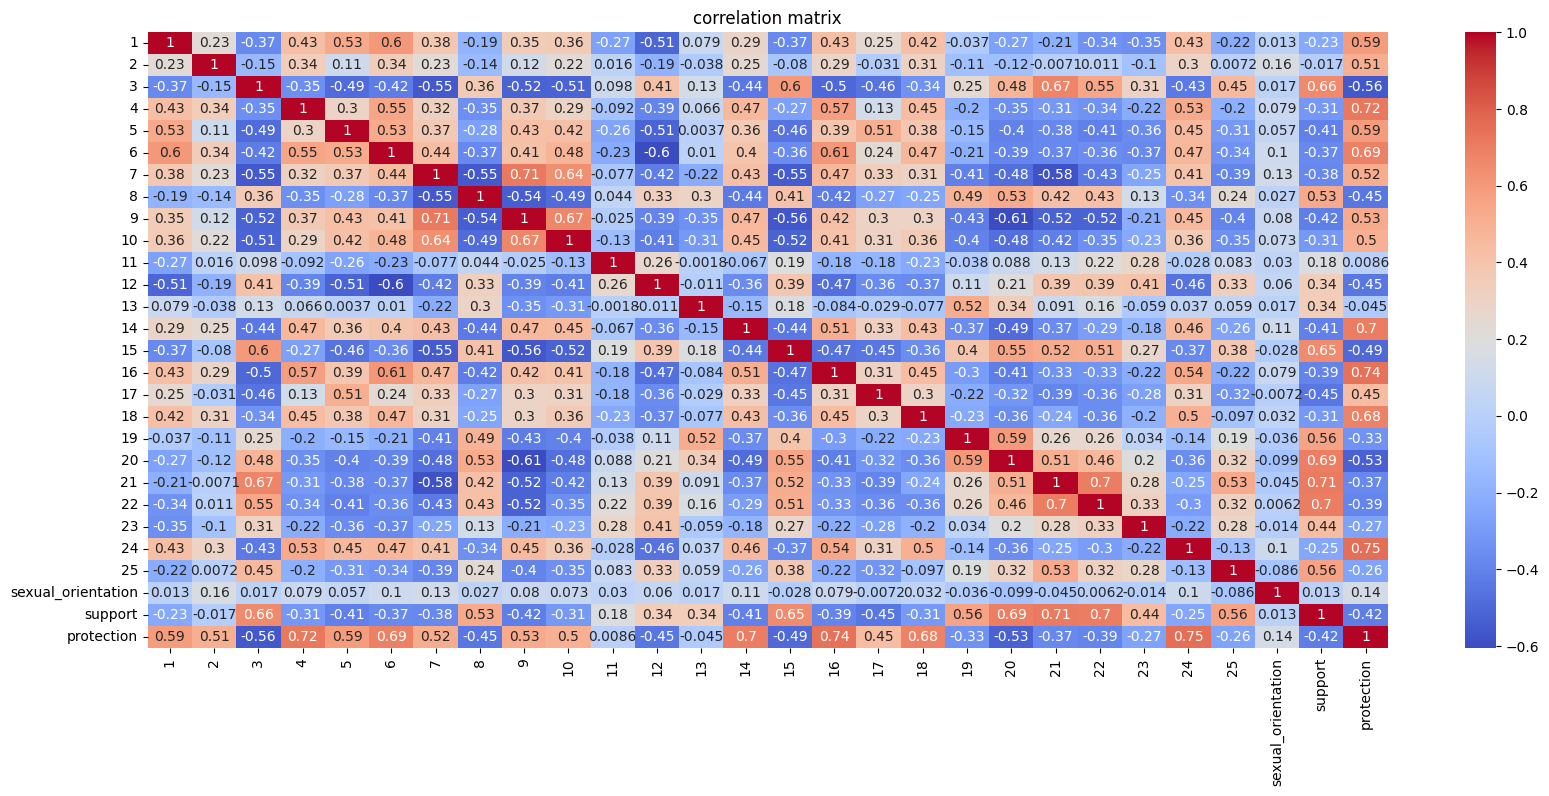

In [16]:
corr_mat = df.corr()

plt.figure( figsize=(20, 8) ) 
sns.heatmap(corr_mat, annot=True, cmap= 'coolwarm')
plt.title('correlation matrix')
plt.show()

<Axes: xlabel='sexual_orientation', ylabel='support'>

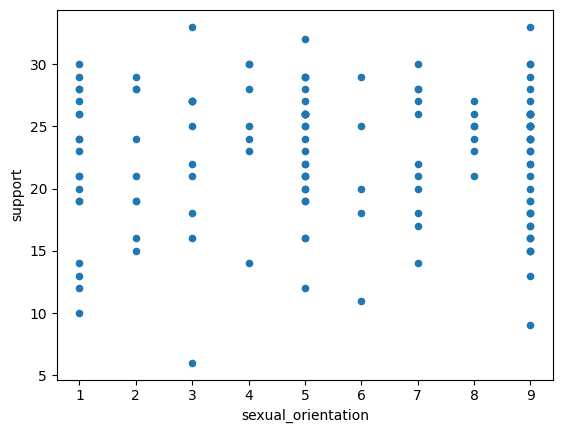

In [17]:
df.plot( x='sexual_orientation', y='support', kind= 'scatter')

<Axes: xlabel='sexual_orientation', ylabel='protection'>

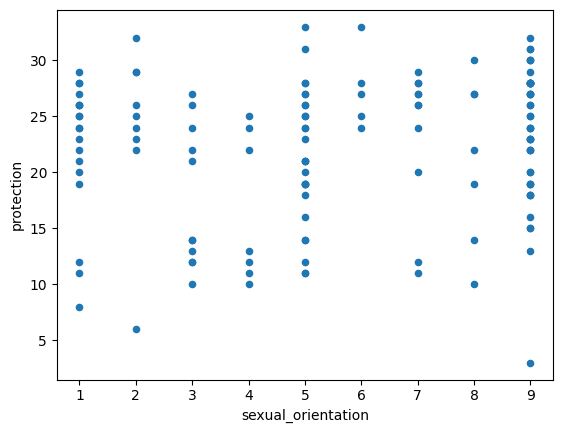

In [18]:
df.plot( x='sexual_orientation', y='protection', kind= 'scatter' )

In [19]:
df_straight = df[df['sexual_orientation'] > 5].reset_index()
df_straight

print('>>> straight_results <<<')
df_straight[['sexual_orientation','support','protection']].describe()


>>> straight_results <<<


,sexual_orientation,support,protection
count,69.000000,69.000000,69.000000
mean,8.362319,22.478261,23.681159
std,0.999574,5.025256,5.914819
min,6.000000,9.000000,3.000000
25%,8.000000,18.000000,20.000000
50%,9.000000,24.000000,25.000000
75%,9.000000,26.000000,28.000000
max,9.000000,33.000000,33.000000


In [20]:
df_gay = df[df['sexual_orientation'] < 5].reset_index()
df_gay

print('>>> gay results <<<')
df_gay[['sexual_orientation','support','protection']].describe()


>>> gay results <<<


,sexual_orientation,support,protection
count,46.000000,46.000000,46.000000
mean,2.130435,22.521739,20.695652
std,1.127607,6.076326,6.856852
min,1.000000,6.000000,6.000000
25%,1.000000,19.000000,13.250000
50%,2.000000,24.000000,23.000000
75%,3.000000,27.000000,26.000000
max,4.000000,33.000000,32.000000
